In [2]:
suppressPackageStartupMessages({
    library(tidyr)
    library(patchwork)
    library(Seurat)
    library(conos)  
    library(dplyr)
    library(ggplot2)
})

## Conos object

In [3]:
conos.8 = readRDS('/home/hsarkar/Projects/ThMYCN/combined_conos_app_v2_conos.rds')

In [4]:
annotations = openxlsx::read.xlsx('/home/hsarkar/Projects/ThMYCN/Sheets/combined_diff_up_reg_v2 - Annotations.xlsx')
annotations = annotations$Annotation

In [5]:
tmp = conos.8$clusters$leiden$groups 
conos.8$clusters$leiden$groups  = annotations[tmp]
names(conos.8$clusters$leiden$groups) = names(tmp)
conos.8$clusters$leiden$groups = as.factor(conos.8$clusters$leiden$groups)

In [6]:
length(levels(conos.8$clusters$leiden$groups))

[1] 23

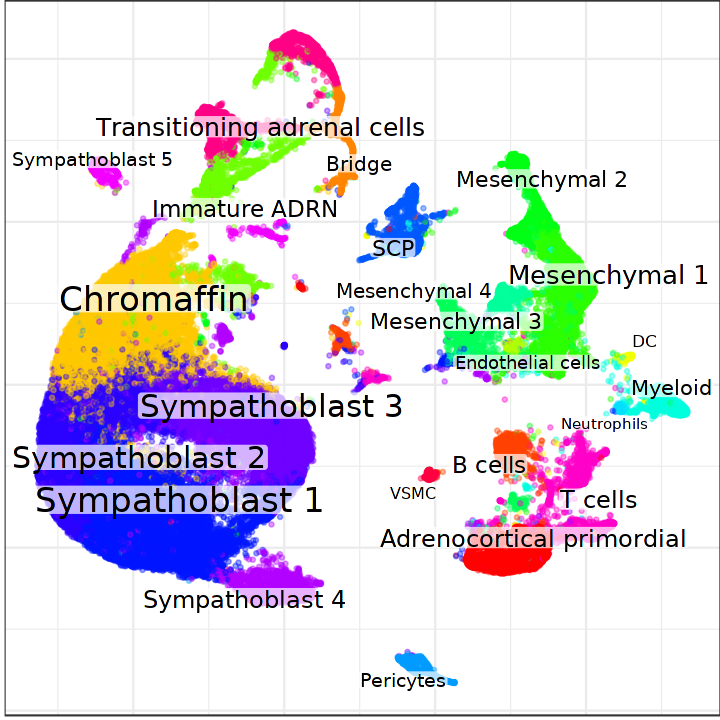

In [7]:
cols = rainbow(23)
colsf = function(n) return(cols)

options(repr.plot.height=6, repr.plot.width=6, res=150 ) 
conos.8$plotGraph(groups = conos.8$clusters$leiden$groups,palette=colsf)

## Seurat Clusters

In [8]:
seurat.8 = readRDS('/home/hsarkar/Projects/neuroblastoma_analysis/results/seurat/mouse_nb_8_samples_seurat.rds')

In [10]:
annot = conos.8$clusters$leiden$groups
names(annot) = sub('(^[^_]+_[^_]+)_(.*)$', '\\2', names(annot))

In [11]:
seurat.8$conos_clusters = annot

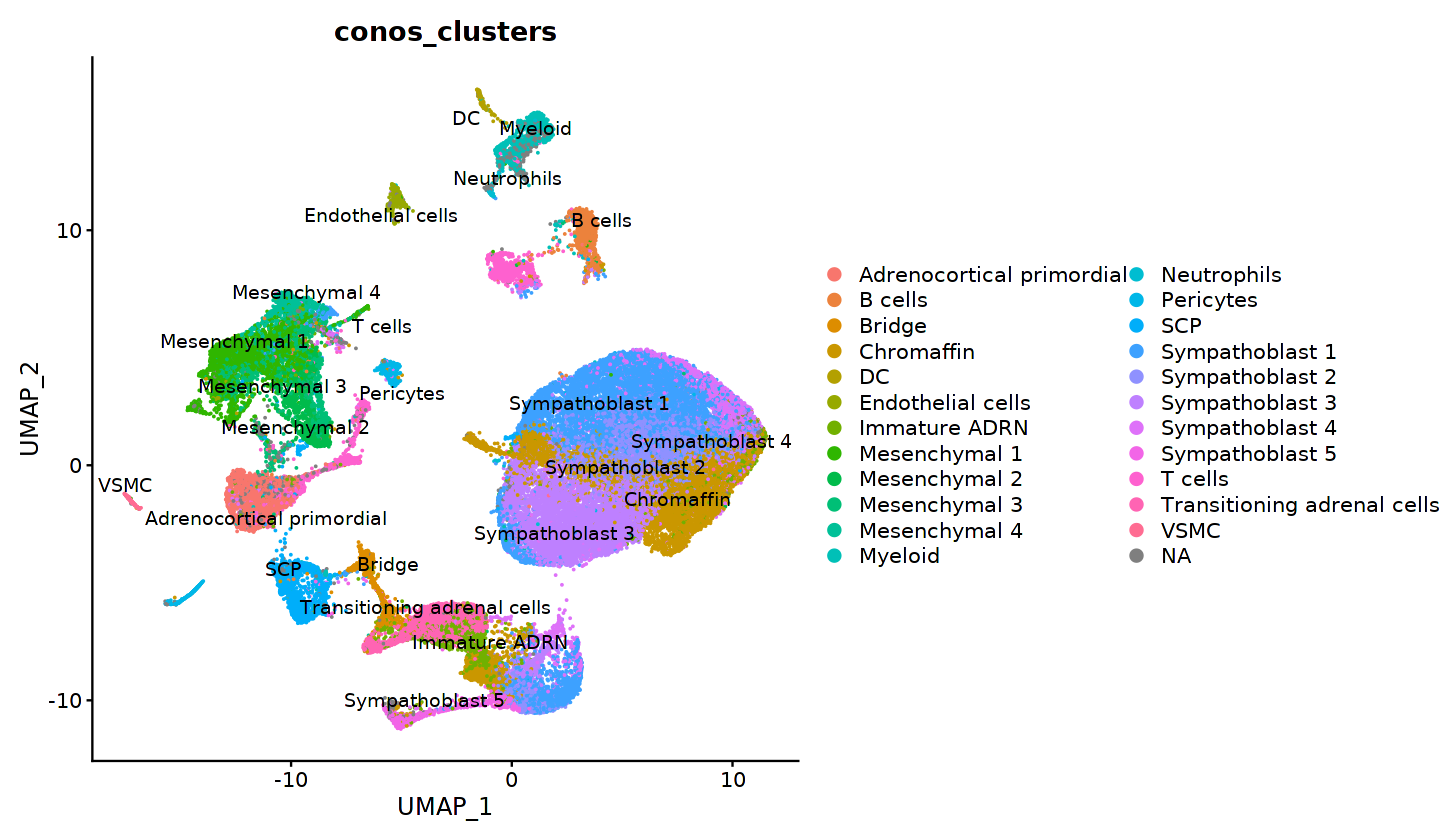

In [12]:
options(repr.plot.height=7, repr.plot.width=12, res=150 ) 
DimPlot(seurat.8, reduction = "umap", group.by = "conos_clusters",label = TRUE, repel = TRUE)

In [13]:
seurat.8.markers <- FindAllMarkers(
    seurat.8, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25
)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Warning message in FindMarkers.default(object = data.use, slot = data.slot, counts = counts, :
“No features pass logfc.threshold threshold; returning empty data.frame”
Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19

Calculating cluster 20

Calculating cluster 21

Calculating cluster 22

Calculating cluster 23

Calculating cluster 24

Calculating cluster 25



In [14]:
saveRDS(seurat.8.markers, '/home/hsarkar/Projects/neuroblastoma_analysis/results/seurat/mouse_nb_8_samples_seurat_markers.rds')

In [15]:
seurat.8.markers %>%
    group_by(cluster) %>%
    dplyr::slice_max(n = 2, order_by = avg_log2FC)

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0.000000e+00,0.3180638,0.067,0.478,0.000000e+00,0,Gm26532
4.864850e-118,0.3091181,0.503,0.520,9.729701e-115,1,Kif22
4.028779e-29,0.2930158,0.295,0.473,8.057557e-26,1,Kif20a
3.459496e-176,24.1818302,0.083,0.358,6.918991e-173,2,Zbtb8b
0.000000e+00,10.0500091,0.806,0.476,0.000000e+00,2,Hist1h1b
0.000000e+00,43.8265083,0.802,0.124,0.000000e+00,3,Gsn
0.000000e+00,34.8004594,0.663,0.052,0.000000e+00,3,Aspn
0.000000e+00,139.3338045,0.999,0.898,0.000000e+00,4,Gm42418
0.000000e+00,100.3809863,0.995,0.881,0.000000e+00,4,Tubb2b


In [16]:
seurat.8.markers %>% 
    group_by(cluster) %>%
    top_n(n = 5, wt = avg_log2FC) -> top5

In [17]:
row.names(subset(seurat.8.markers, cluster == 6))

[1] "Krt15"         "Krt14"         "Sostdc1"       "Krt5"         
 [5] "Wnt6"          "Perp"          "Cxcl14"        "Wnt7b"        
 [9] "Gjb2"          "Gjb6"          "Sfn"           "Dsp"          
[13] "Wnt4"          "Epcam"         "Fgfbp1"        "Trp63"        
[17] "Pdlim1"        "Kremen2"       "Trim29"        "Ablim1"       
[21] "Wls"           "Spint21"       "Itgb51"        "Ccnd21"       
[25] "Pdgfa"         "Lef11"         "Upk3bl"        "Tacstd2"      
[29] "Vamp8"         "Krt17"         "Gpr1831"       "Npr3"         
[33] "Emx21"         "Cldn4"         "Il1r1"         "Pkp1"         
[37] "Cldn6"         "Rhoh"          "Kitl"          "Gja1"         
[41] "4631405K08Rik" "Gm16136"       "Efna1"         "Fxyd3"        
[45] "Fmod1"         "Myh91"         "Gpx81"         "Gas11"        
[49] "Irx2"          "Tuba1c1"       "Slc2a31"       "Npnt"         
[53] "Col17a1"       "Krt7"          "Tnfaip8"       "Mapk13"       
[57] "Wfdc2"         "Gltp1"         "Rnase41"       "Mmp141"       
[61] "Hist1h2ap"     "Tnfrsf1a"      "Galnt18"       "Htra11"       
[65] "Pou3f11"       "Cdh1"          "Barx2"         "Mgst31"       
[69] "Spon2"         "Emp1"          "Fzd10"         "Frem2"

In [26]:
levels(seurat.8.markers$cluster)

[1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14"
[16] "15" "16" "17" "18" "19" "20" "21" "22" "23" "24" "25"

In [37]:
s1_10 = subset(x = seurat.8, idents = levels(seurat.8.markers$cluster)[1:10], invert = TRUE)

In [29]:
options(repr.plot.height=10, repr.plot.width=15, res=150 )
p1_10 = DoHeatmap(s1_10, features = top5$gene) + NoLegend()
ggsave(
   filename= '/home/hsarkar/Projects/neuroblastoma_analysis/results/seurat/mouse_nb_8_samples_cluster_1_10.pdf',
   plot= p1_10, 
   height=20,
   width=30
)

In [41]:
levels(seurat.8.markers$seurat_clusters)[1:10]

NULL

In [54]:
s1_10 = subset(x = seurat.8, idents = '1', invert = TRUE)

In [55]:
unique(as.vector(s1_10$seurat_clusters))

[1] "2"  "0"  "20" "8"  "12" "9"  "15" "25" "7"  "21" "14" "22" "4"  "3"  "11"
[16] "5"  "24" "18" "13" "16" "6"  "10" "17" "23" "19"

In [30]:
s11_25 = subset(x = seurat.8, idents = levels(seurat.8.markers$cluster)[11:25], invert = TRUE)
options(repr.plot.height=10, repr.plot.width=15, res=150 )
p11_25 = DoHeatmap(s11_25, features = top5$gene) + NoLegend()
ggsave(
   filename= '/home/hsarkar/Projects/neuroblastoma_analysis/results/seurat/mouse_nb_8_samples_cluster_11_25.pdf',
   plot= p11_25,
   height=20,
   width=40
)

In [31]:
levels(seurat.8.markers$cluster)[11:25]

[1] "10" "11" "12" "13" "14" "15" "16" "17" "18" "19" "20" "21" "22" "23" "24"

## Make conos app after subsampling

In [9]:
# Attach packages
library(groupdata2)

# Create data frame
df <- data.frame(
  "participant" = factor(c(1, 1, 2, 3, 3, 3, 3, 4, 4, 5, 5, 5, 5)),
  "diagnosis" = factor(c(0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0)),
  "trial" = c(1, 2, 1, 1, 2, 3, 4, 1, 2, 1, 2, 3, 4),
  "score" = sample(c(1:100), 13)
)

# Using downsample()
downsample(df, cat_col = "diagnosis")

participant,diagnosis,trial,score
<fct>,<fct>,<dbl>,<int>
1,0,2,86
3,0,2,69
3,0,1,92
2,1,1,18
4,1,1,88
4,1,2,87


In [38]:
conos.8.cluster.df = conos.8$clusters$leiden$groups %>% data.frame %>% magrittr::set_colnames(c('cluster_name')) %>%
    tibble::rownames_to_column('cell_name')

In [50]:
conos.8.cluster.df.subset = downsample(conos.8.cluster.df, cat_col = 'cluster_name', id_method = 'nested') 

In [53]:
saveRDS(conos.8.cluster.df.subset, '/home/hsarkar/Projects/neuroblastoma_analysis/results/pagoda_apps/conos_8_subset.rds')

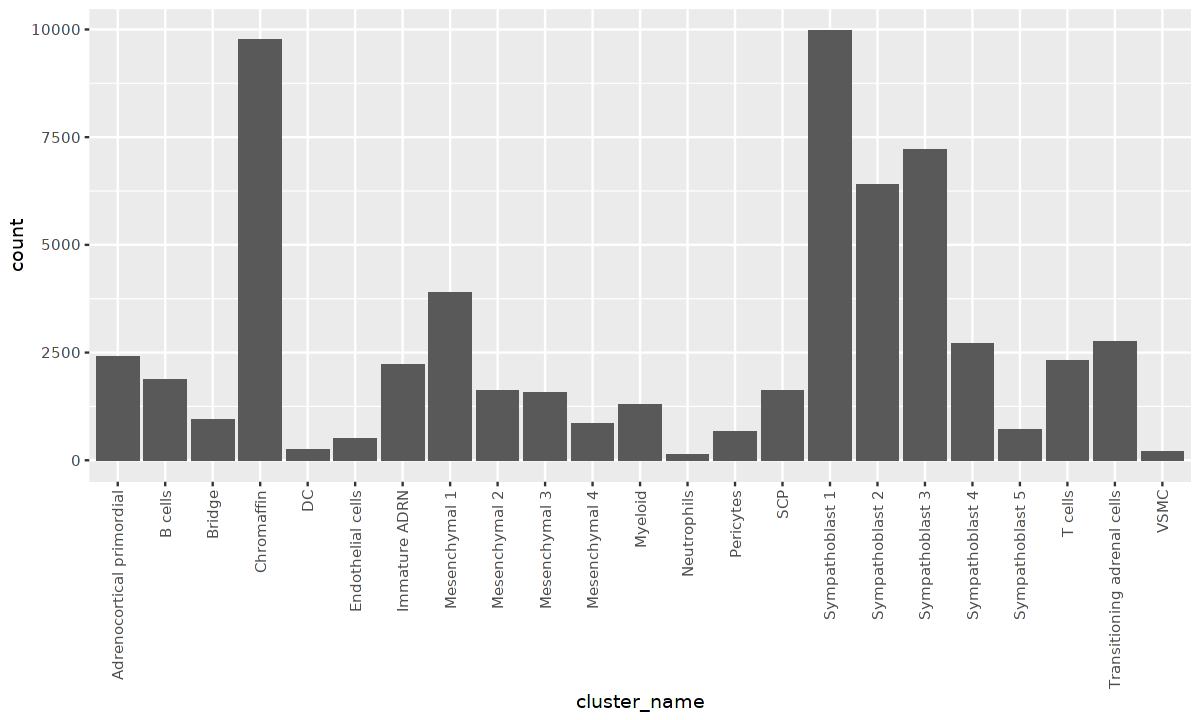

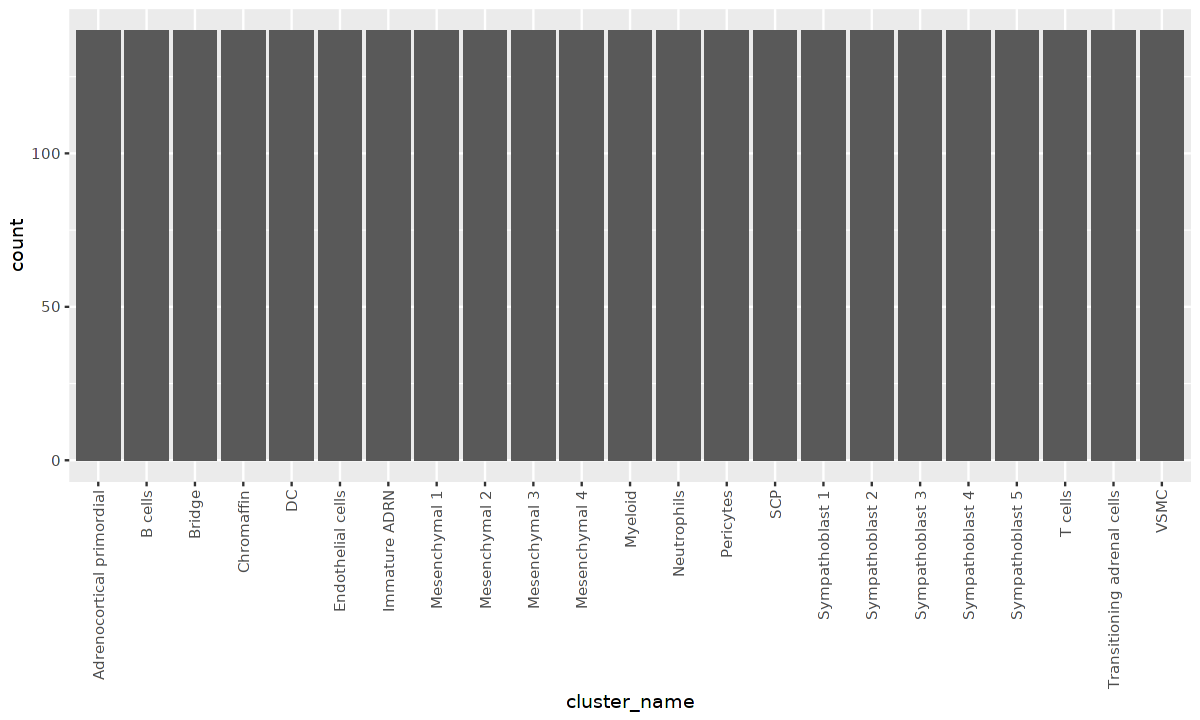

In [51]:
options(repr.plot.height=6, repr.plot.width=10, res=150 ) 
conos.8.cluster.df %>% group_by(cluster_name) %>% 
    summarise(Freq=n()) %>% ggplot(aes(cluster_name)) + geom_bar(aes(weight=Freq)) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

conos.8.cluster.df.subset %>% group_by(cluster_name) %>% 
    summarise(Freq=n()) %>% ggplot(aes(cluster_name)) + geom_bar(aes(weight=Freq)) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

In [54]:
conos.8.cluster.df.subset$cell_name %>% head

[1] "adrenal_71_adrenal_71_GTTGTAGGTATGCGTT-1"
[2] "adrenal_71_adrenal_71_CTCAATTTCGTTCTAT-1"
[3] "adrenal_71_adrenal_71_AGGAGGTAGGAAGTAG-1"
[4] "adrenal_71_adrenal_71_TCTTAGTGTACCATAC-1"
[5] "adrenal_70_adrenal_70_TACGGGCCAGCGGATA-1"
[6] "adrenal_71_adrenal_71_AGAGCCCTCTTCTTCC-1"

In [56]:
rownames(conos.8$samples$adrenal_70$counts) %>% head

[1] "adrenal_70_adrenal_70_AAACCCAAGAGGCTGT-1"
[2] "adrenal_70_adrenal_70_AAACCCAAGGATGCGT-1"
[3] "adrenal_70_adrenal_70_AAACCCAAGGCTATCT-1"
[4] "adrenal_70_adrenal_70_AAACCCAAGGGCAACT-1"
[5] "adrenal_70_adrenal_70_AAACCCACAACGCCCA-1"
[6] "adrenal_70_adrenal_70_AAACCCACATAGAGGC-1"

In [57]:
c('adrenal_71_adrenal_71_GTTGTAGGTATGCGTT-1','adrenal_71_adrenal_71_CTCAATTTCGTTCTAT-1')

[1] "adrenal_71_adrenal_71_GTTGTAGGTATGCGTT-1"
[2] "adrenal_71_adrenal_71_CTCAATTTCGTTCTAT-1"

In [52]:
conos.8.subset.app = p2app4conos(conos=conos.8, file="/home/hsarkar/Projects/neuroblastoma_analysis/results/pagoda_apps/conos.8.subset.bin", 
                          save=TRUE,n.cores = 10,cell.subset = conos.8.cluster.df.subset$cell_name)







3220 cells, 26475 genes; normalizing ... 

Using plain model 

Winsorizing ... 

log scale ... 

done.


calculating variance fit ...

 using gam 

1495 overdispersed genes ... 1495

persisting ... 

done.

running PCA using 3000 OD genes .

.

.

.

 done




creating space of type angular done
adding data ... done
building index ... done
querying ... done


Estimating embeddings.


running tSNE using 10 cores:




creating space of type angular done
adding data ... done
building index ... done
querying ... done


Cluster 23 contains less than 5 cells - no Ordering applied

Cluster 9 contains less than 5 cells - no Ordering applied

Cluster 15 contains less than 5 cells - no Ordering applied

Cluster 11 contains less than 5 cells - no Ordering applied

Cluster 8 contains less than 5 cells - no Ordering applied

Cluster 10 contains less than 5 cells - no Ordering applied

Cluster 6 contains less than 5 cells - no Ordering applied

Cluster 14 contains less than 5 cells - no Ordering applied

Cluster 1 contains less than 5 cells - no Ordering applied

Cluster 21 contains less than 5 cells - no Ordering applied

Cluster 3 contains less than 5 cells - no Ordering applied

Cluster 20 contains less than 5 cells - no Ordering applied

Cluster 7 contains less than 5 cells - no Ordering applied

Cluster 22 contains less than 5 cells - no Ordering applied

Cluster 19 contains less than 5 cells - no Ordering applied

Cluster 4 contains less than 5 cells - no Ordering applied

Cluster 18 contains less than 5

ERROR: Error in originalP2object$counts[mainDendrogram$cellorder, ]: invalid or not-yet-implemented 'Matrix' subsetting
